In [343]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [344]:
df = pd.read_csv('vgsales.csv')

In [345]:
df.shape

(16598, 11)

In [346]:
df.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [347]:
df.drop(columns=['Rank'], inplace=True)

In [348]:
df['Genre'].unique()

array(['Sports', 'Platform', 'Racing', 'Role-Playing', 'Puzzle', 'Misc',
       'Shooter', 'Simulation', 'Action', 'Fighting', 'Adventure',
       'Strategy'], dtype=object)

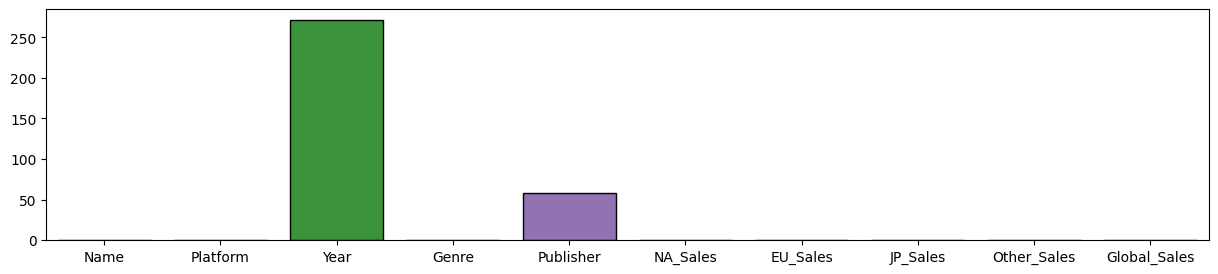

In [349]:
plt.figure(figsize=(15, 3))
sns.barplot(x=df.columns, y=df.isnull().sum().values, linewidth=1, edgecolor='black')
plt.show()

In [350]:
df.describe()

,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
count,16327.000000,16598.000000,16598.000000,16598.000000,16598.000000,16598.000000
mean,2006.406443,0.264667,0.146652,0.077782,0.048063,0.537441
std,5.828981,0.816683,0.505351,0.309291,0.188588,1.555028
min,1980.000000,0.000000,0.000000,0.000000,0.000000,0.010000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,0.170000
75%,2010.000000,0.240000,0.110000,0.040000,0.040000,0.470000
max,2020.000000,41.490000,29.020000,10.220000,10.570000,82.740000


In [351]:
df.describe(include=['O'])

,Name,Platform,Genre,Publisher
count,16598,16598,16598,16540
unique,11493,31,12,578
top,Need for Speed: Most Wanted,DS,Action,Electronic Arts
freq,12,2163,3316,1351


In [352]:
df.columns

Index(['Name', 'Platform', 'Year', 'Genre', 'Publisher', 'NA_Sales',
       'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales'],
      dtype='object')

In [353]:
def name_checker(dd):
    if dd.value_counts().sum() == dd.str.lower().value_counts().sum():
        return 'No error'
    else:
        return 'Error'

In [354]:
categorical_cols = df.select_dtypes(include=['O']).columns

for col in categorical_cols:
    print(col, name_checker(df[col]))
# same number indicates no error in names. 

Name No error
Platform No error
Genre No error
Publisher No error


##### 1) Which Platform is mostly used?
##### 2) Which Genere is prefered by each country based on sales?
##### 3) Which year had the most number of sales? --> reveal the boom of gaming industry
##### 4) Sales progression of the most sold game over the year


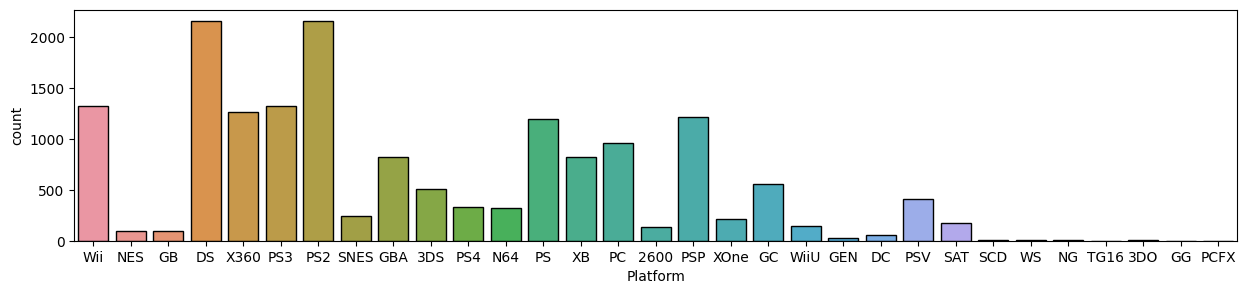

In [355]:
# Number 1

plt.figure(figsize=(15, 3))
sns.countplot(data=df, x='Platform', linewidth=1, edgecolor='black')
plt.show()

In [356]:
df.head()

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


C:\Users\Dell 9010\AppData\Local\Temp\ipykernel_14684\3986207212.py:4: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  genre_sales = df.groupby('Genre')['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales'].sum().reset_index()


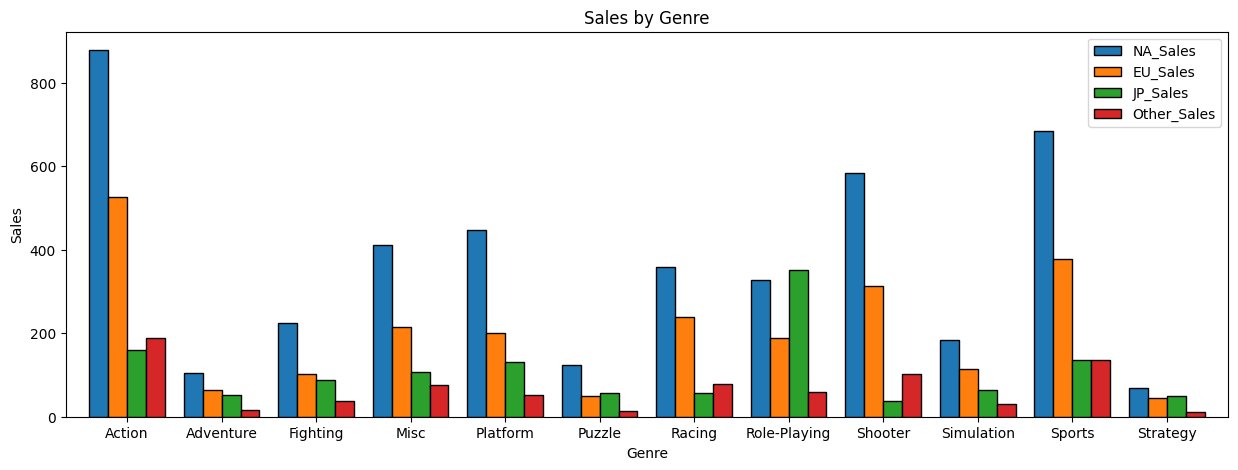

In [357]:
# Number 2


genre_sales = df.groupby('Genre')['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales'].sum().reset_index()


genre_sales.set_index('Genre', inplace=True)
ax = genre_sales.plot(kind='bar', figsize=(15, 5), width=0.8, edgecolor='black', linewidth=1)
plt.xticks(rotation=0)
ax.set_xlabel('Genre')
ax.set_ylabel('Sales')
ax.set_title('Sales by Genre')
plt.show()

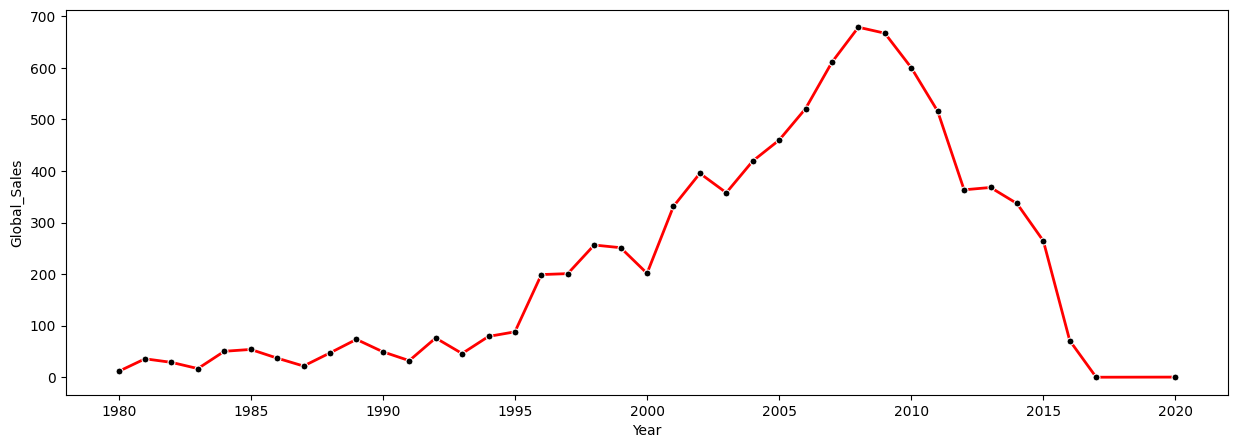

In [358]:
# Number 3

plt.figure(figsize=(15, 5))
year_sales = df.groupby('Year')['Global_Sales'].sum().reset_index()
year_sales.set_index('Year', inplace=True)
sns.lineplot(data=year_sales, x=year_sales.index, y='Global_Sales', linewidth=2, color='red', marker='o', markerfacecolor='black', markersize=5)
plt.show()

In [359]:
# Number 4

most_sold_game = df.groupby('Name')['Global_Sales'].sum()
print('Most sold game is', most_sold_game.idxmax(), 'with', most_sold_game.max(), 'sales')

Most sold game is Wii Sports with 82.74 sales


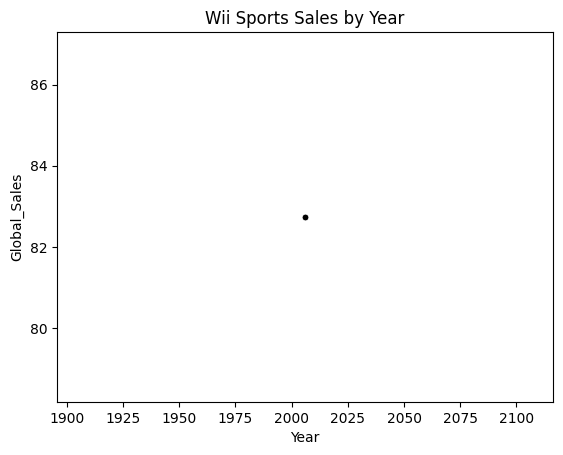

In [360]:
df_wii = df[df['Name'] == 'Wii Sports']

sns.lineplot(data=df_wii, x='Year', y='Global_Sales', linewidth=2, color='red', marker='o', markerfacecolor='black', markersize=5)
plt.title('Wii Sports Sales by Year')
plt.show()

#### Fixing Missing Values

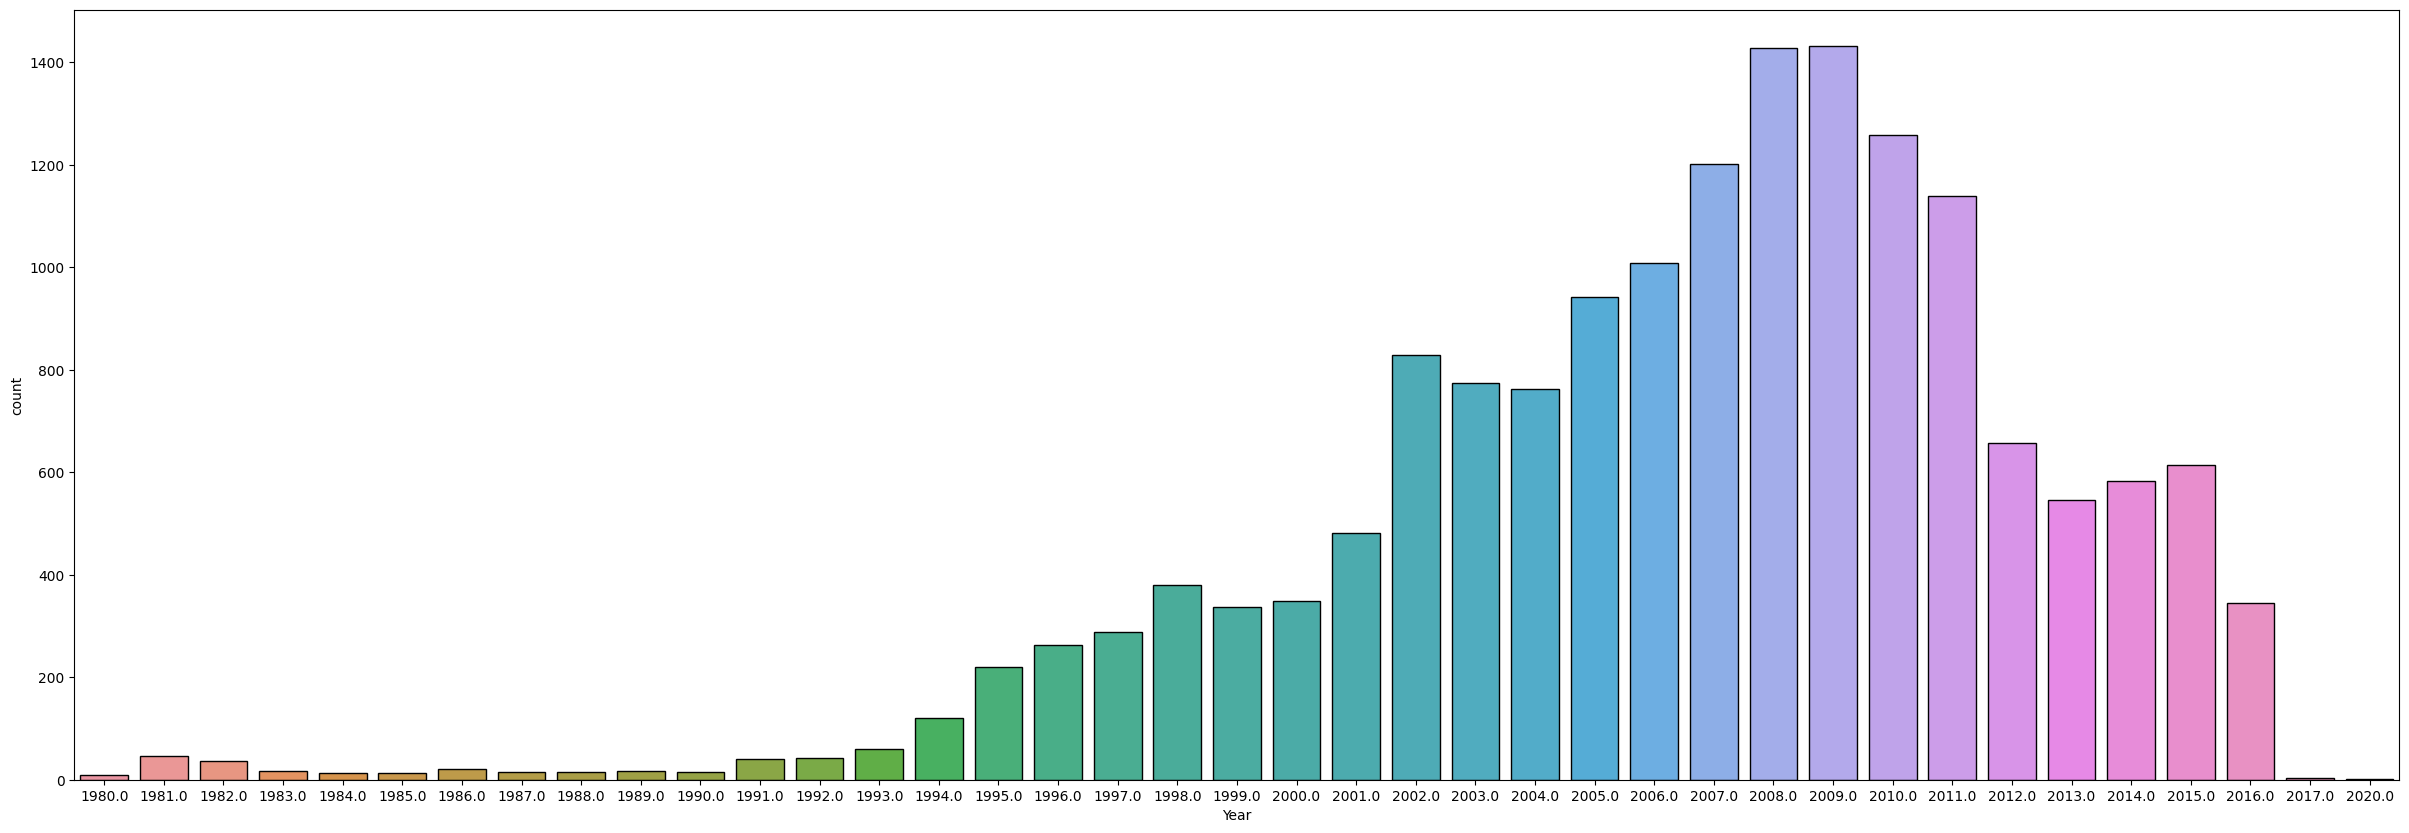

In [361]:
plt.figure(figsize=(30, 10))
sns.countplot(data=df, x='Year', linewidth=1, edgecolor='black')
plt.show()

In [362]:
df['Year'].fillna(df['Year'].median(), inplace=True)

In [363]:
df['Publisher'].value_counts().head(5)

Electronic Arts                 1351
Activision                       975
Namco Bandai Games               932
Ubisoft                          921
Konami Digital Entertainment     832
Name: Publisher, dtype: int64

In [364]:
df['Publisher'].fillna(df['Publisher'].mode()[0], inplace=True)

In [365]:
df.isnull().sum()

Name            0
Platform        0
Year            0
Genre           0
Publisher       0
NA_Sales        0
EU_Sales        0
JP_Sales        0
Other_Sales     0
Global_Sales    0
dtype: int64

#### checking for outliers

In [366]:
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns

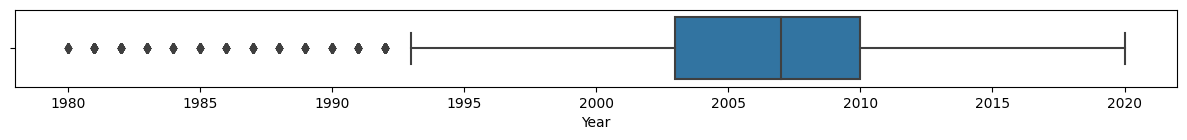

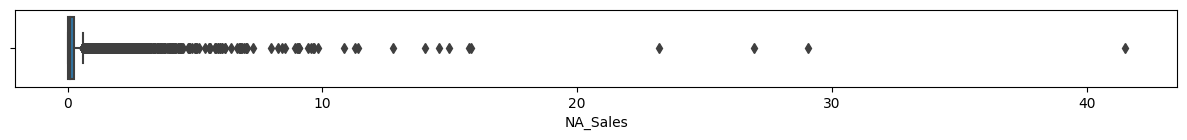

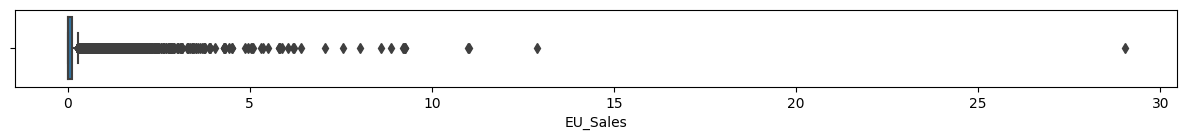

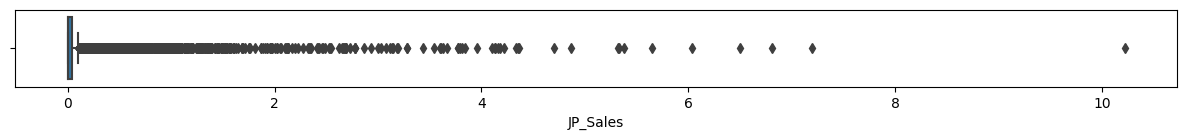

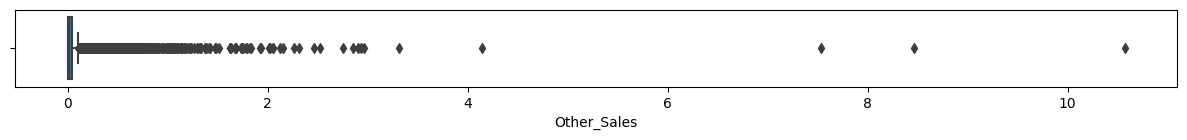

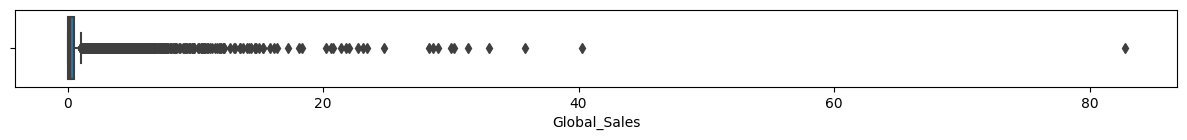

In [367]:
for col in numeric_cols:
    plt.figure(figsize=(15, 1))
    ax = sns.boxplot(data=df, x=col)
    plt.show()
    

In [368]:
for col in numeric_cols:
    percentile25 = df[col].quantile(0.25)
    percentile75 = df[col].quantile(0.75)
    iqr = percentile75 - percentile25
    upper_limit = percentile75 + 1.5 * iqr
    lower_limit = percentile25 - 1.5 * iqr

    df[col] = np.where(
    df[col]>upper_limit,
    upper_limit,
    np.where(
        df[col]<lower_limit,
        lower_limit,
        df[col]
    )
)

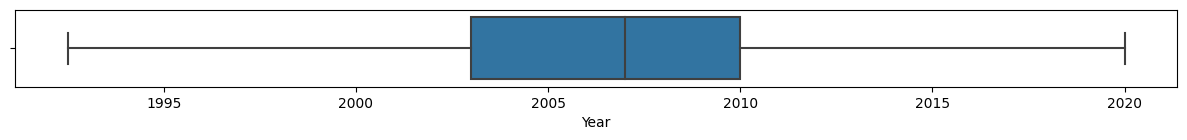

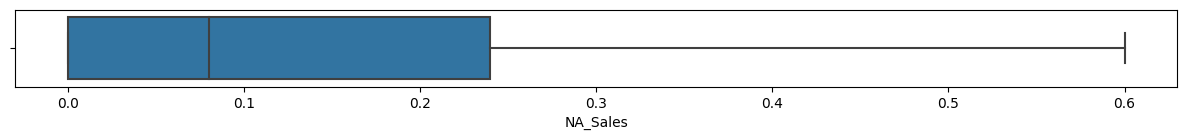

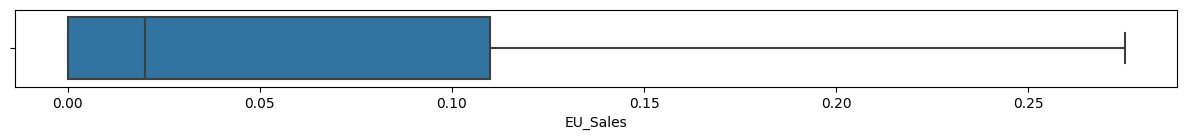

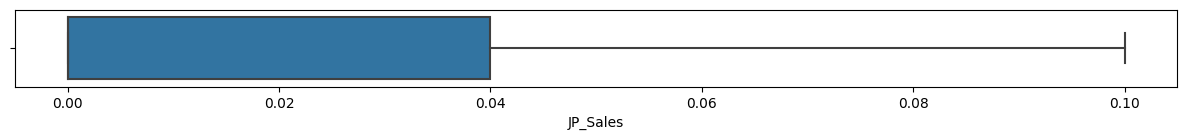

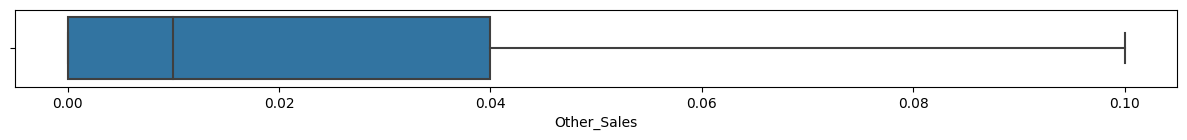

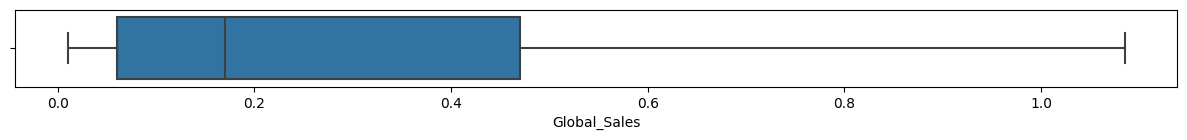

In [369]:
for col in numeric_cols:
    plt.figure(figsize=(15, 1))
    ax = sns.boxplot(data=df, x=col)
    plt.show()

#### Machine Learning Model

In [370]:
from sklearn.preprocessing import LabelEncoder

for col in categorical_cols:
    df[col] = LabelEncoder().fit_transform(df[col])

In [371]:
df.head()

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,11007,26,2006.0,10,359,0.6,0.275,0.1,0.1,1.085
1,9327,11,1992.5,4,359,0.6,0.275,0.1,0.1,1.085
2,5573,26,2008.0,6,359,0.6,0.275,0.1,0.1,1.085
3,11009,26,2009.0,10,359,0.6,0.275,0.1,0.1,1.085
4,7346,5,1996.0,7,359,0.6,0.275,0.1,0.1,1.085


<Axes: >

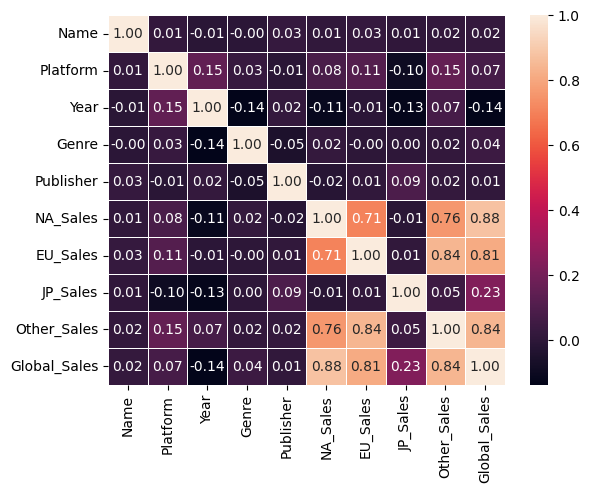

In [372]:
sns.heatmap(df.corr(), annot=True, linewidths=0.5, fmt='.2f')

In [373]:
numeric_cols = df.select_dtypes(include=['int64', 'float64', 'int32']).columns

In [374]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
df[numeric_cols] = scaler.fit_transform(df[numeric_cols])

df.head()

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,0.957797,0.866667,0.490909,0.909091,0.622184,1.0,1.0,1.0,1.0,1.0
1,0.811608,0.366667,0.000000,0.363636,0.622184,1.0,1.0,1.0,1.0,1.0
2,0.484946,0.866667,0.563636,0.545455,0.622184,1.0,1.0,1.0,1.0,1.0
3,0.957971,0.866667,0.600000,0.909091,0.622184,1.0,1.0,1.0,1.0,1.0
4,0.639227,0.166667,0.127273,0.636364,0.622184,1.0,1.0,1.0,1.0,1.0


In [376]:
from sklearn.model_selection import train_test_split

X = df.drop(columns=['Global_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Name'])
y = df['Global_Sales']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [377]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_train, y_train)

y_pred = lr.predict(X_test)

In [378]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error

print('R2 score is', r2_score(y_test, y_pred))
print('MAE is', mean_absolute_error(y_test, y_pred))

R2 score is 0.7757623868555286
MAE is 0.10241557275300416


In [382]:
from xgboost import XGBRegressor

xgb = XGBRegressor()
xgb.fit(X_train, y_train)

y_pred = xgb.predict(X_test)

print('R2 score is', r2_score(y_test, y_pred))
print('MAE is', mean_absolute_error(y_test, y_pred))

R2 score is 0.8458257930753317
MAE is 0.07479000076400069


In [383]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor()
rf.fit(X_train, y_train)

y_pred = rf.predict(X_test)

print('R2 score is', r2_score(y_test, y_pred))
print('MAE is', mean_absolute_error(y_test, y_pred))

R2 score is 0.8298710849385509
MAE is 0.07754442654125902


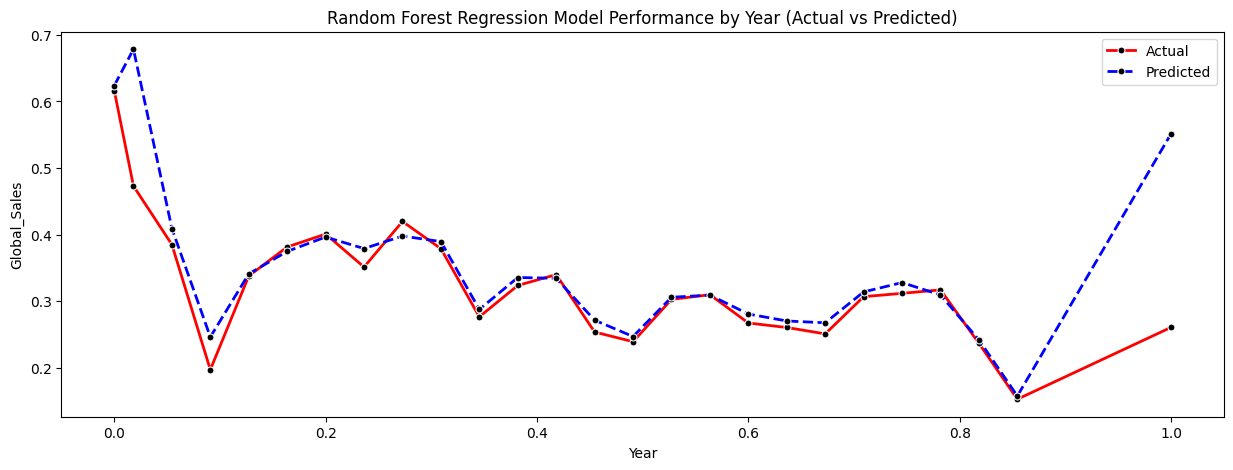

In [385]:
plt.figure(figsize=(15, 5))
sns.lineplot(x=X_test['Year'], y=y_test, linewidth=2, color='red', marker='o', markerfacecolor='black', markersize=5, errorbar=None)
sns.lineplot(x=X_test['Year'], y=y_pred, linewidth=2, color='blue', linestyle='--' ,marker='o', markerfacecolor='black', markersize=5, errorbar=None)
plt.legend(['Actual', 'Predicted'])
plt.title('Random Forest Regression Model Performance by Year (Actual vs Predicted)')
plt.show()